In [ ]:
import pandas as pd
import sklearn
import tensorflow
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
dataset=pd.read_csv('/content/EX1 - Sheet1.csv')

In [ ]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('EX1').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset=pd.DataFrame(data[1:],columns=data[0])
dataset = dataset.astype({'x':'float'})
dataset = dataset.astype({'y':'float'})


In [ ]:
dataset.head()

,x,y,
0,1.0,20.0,
1,2.0,50.0,
2,3.0,60.0,
3,4.0,40.0,
4,5.0,40.0,


In [ ]:
x=dataset[['x']].values
y=dataset[['y']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1 = scaler.transform(x_train)

In [ ]:
ai_brain = Sequential([Dense(8,activation='relu'),
                       Dense(10,activation='relu'),
                       Dense(1)])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss ='mse')
ai_brain.fit(x_train,y_train,epochs=20)



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4863
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.0425
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.6324
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.4203
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3.5369
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3.4406
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.4719
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 3.5017
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.3941
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 3.4747
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.4431
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3.4299
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.5098
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.4150
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.4578
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━

<Axes: >

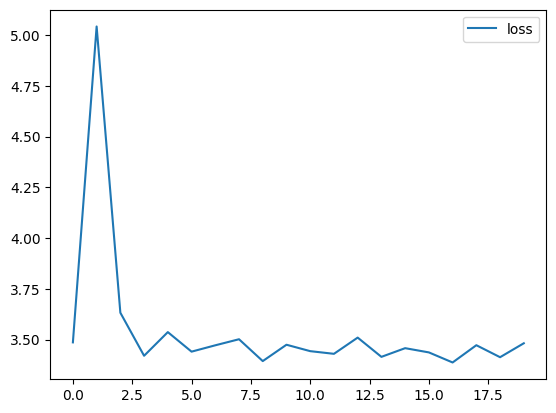

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()


In [ ]:
ai_brain.evaluate(x_test,y_test)
X_n1 = [[3]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 160.8177


In [ ]:
X_n1_1 = scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[6.499988]], dtype=float32)